## Libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ydata_profiling
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

## Data Exploration

In [2]:
df = pd.read_csv('Housing.csv')

In [3]:
df.head()

Unnamed: 0                                 Address      Zip     Price  \
0           1            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0   
1           2  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0   
2           3              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   
3           4            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   
4           5              Winterjanpad 21, Amsterdam  1036 KN  720000.0   

   Area  Room       Lon        Lat  
0    64     3  4.907736  52.356157  
1    60     3  4.850476  52.348586  
2   109     4  4.944774  52.343782  
3   128     6  4.789928  52.343712  
4   138     5  4.902503  52.410538

In [4]:
df.shape

(924, 8)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 924 entries, 0 to 923
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  924 non-null    int64  
 1   Address     924 non-null    object 
 2   Zip         924 non-null    object 
 3   Price       920 non-null    float64
 4   Area        924 non-null    int64  
 5   Room        924 non-null    int64  
 6   Lon         924 non-null    float64
 7   Lat         924 non-null    float64
dtypes: float64(3), int64(3), object(2)
memory usage: 57.9+ KB


In [6]:
df.describe()

Unnamed: 0         Price        Area        Room         Lon  \
count  924.000000  9.200000e+02  924.000000  924.000000  924.000000   
mean   462.500000  6.220654e+05   95.952381    3.571429    4.888605   
std    266.880123  5.389942e+05   57.447436    1.592332    0.053140   
min      1.000000  1.750000e+05   21.000000    1.000000    4.644819   
25%    231.750000  3.500000e+05   60.750000    3.000000    4.855834   
50%    462.500000  4.670000e+05   83.000000    3.000000    4.886818   
75%    693.250000  7.000000e+05  113.000000    4.000000    4.922337   
max    924.000000  5.950000e+06  623.000000   14.000000    5.029122   

              Lat  
count  924.000000  
mean    52.363326  
std      0.024028  
min     52.291519  
25%     52.352077  
50%     52.364631  
75%     52.377598  
max     52.423805

In [7]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         4
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

In [8]:
df['Price'].fillna(0, inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0    0
Address       0
Zip           0
Price         0
Area          0
Room          0
Lon           0
Lat           0
dtype: int64

## Data Preprocessing

In [10]:
df = df.dropna()
del df['Unnamed: 0']

In [11]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [16]:
df['street_name'] = df['Address'].apply(lambda x: str(x.split(' ')[0]))
df['ZipNo'] = df['Zip'].apply(lambda x: int(x.split(' ')[0]))
df['AreaCode'] = df['Zip'].apply(lambda x: str(x.split(' ')[1]))
df.head()

Address      Zip     Price  Area  Room  \
0            Blasiusstraat 8 2, Amsterdam  1091 CR  685000.0    64     3   
1  Kromme Leimuidenstraat 13 H, Amsterdam  1059 EL  475000.0    60     3   
2              Zaaiersweg 11 A, Amsterdam  1097 SM  850000.0   109     4   
3            Tenerifestraat 40, Amsterdam  1060 TH  580000.0   128     6   
4              Winterjanpad 21, Amsterdam  1036 KN  720000.0   138     5   

        Lon        Lat     street_name  ZipNo AreaCode  
0  4.907736  52.356157   Blasiusstraat   1091       CR  
1  4.850476  52.348586          Kromme   1059       EL  
2  4.944774  52.343782      Zaaiersweg   1097       SM  
3  4.789928  52.343712  Tenerifestraat   1060       TH  
4  4.902503  52.410538    Winterjanpad   1036       KN

In [17]:
df.drop('Zip',axis=1,inplace=True)
df.drop('Address',axis=1,inplace=True)

In [18]:
df.head()

Price  Area  Room       Lon        Lat     street_name  ZipNo AreaCode
0  685000.0    64     3  4.907736  52.356157   Blasiusstraat   1091       CR
1  475000.0    60     3  4.850476  52.348586          Kromme   1059       EL
2  850000.0   109     4  4.944774  52.343782      Zaaiersweg   1097       SM
3  580000.0   128     6  4.789928  52.343712  Tenerifestraat   1060       TH
4  720000.0   138     5  4.902503  52.410538    Winterjanpad   1036       KN

## Visualization

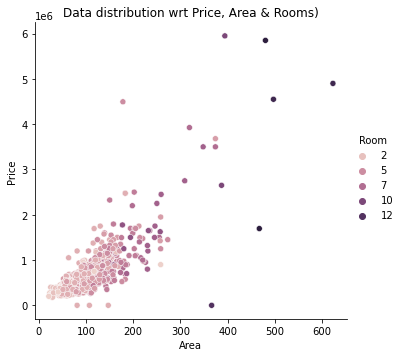

In [12]:
sns.relplot(data=df, x="Area", y="Price", hue="Room").set(title='Data distribution wrt Price, Area & Rooms)')

plt.show()

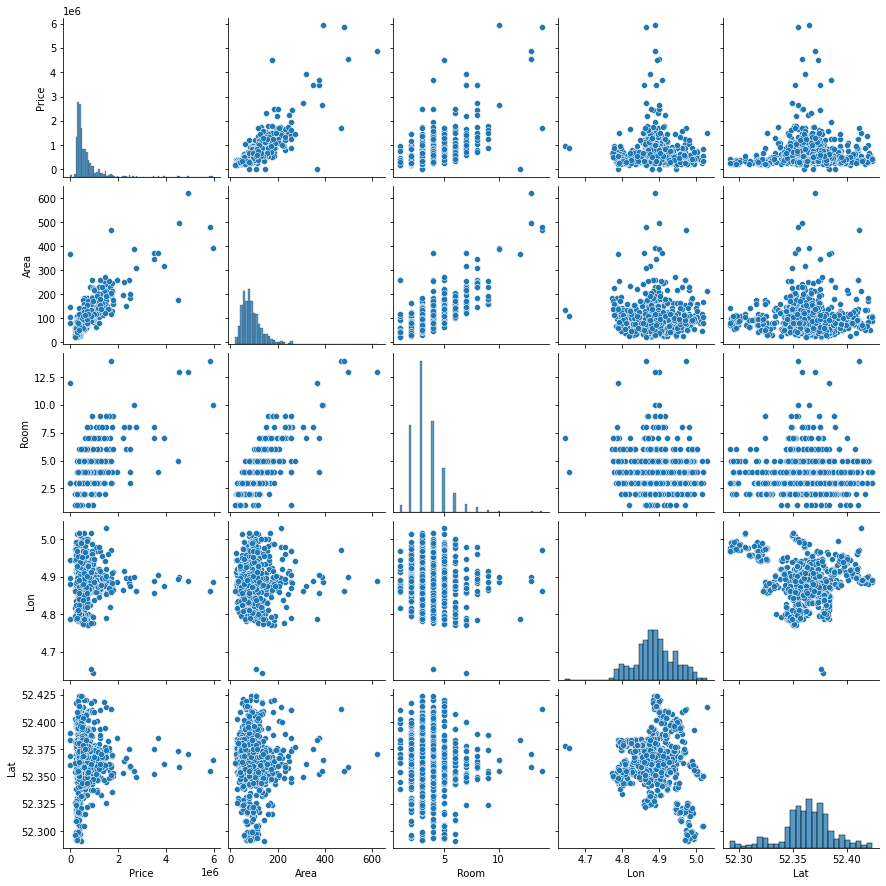

In [13]:
sns.pairplot(df)

In [14]:
df.corr()

Price      Area      Room       Lon       Lat
Price  1.000000  0.815340  0.606741 -0.012474  0.059342
Area   0.815340  1.000000  0.812421  0.012196  0.017993
Room   0.606741  0.812421  1.000000 -0.036585 -0.016381
Lon   -0.012474  0.012196 -0.036585  1.000000 -0.184436
Lat    0.059342  0.017993 -0.016381 -0.184436  1.000000

<AxesSubplot:xlabel='Price'>

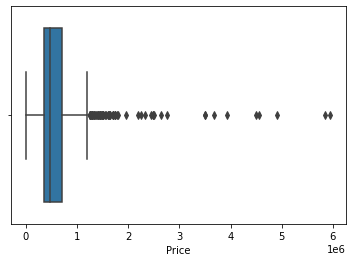

In [15]:
sns.boxplot(x='Price', data = df)

<AxesSubplot:>

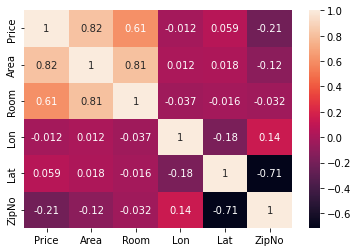

In [19]:
sns.heatmap(df.corr(),annot=True)

## Data Split / Model Training

In [20]:
y = df['Price']
X = df.drop('Price', axis = 1)

X.head()


Area  Room       Lon        Lat     street_name  ZipNo AreaCode
0    64     3  4.907736  52.356157   Blasiusstraat   1091       CR
1    60     3  4.850476  52.348586          Kromme   1059       EL
2   109     4  4.944774  52.343782      Zaaiersweg   1097       SM
3   128     6  4.789928  52.343712  Tenerifestraat   1060       TH
4   138     5  4.902503  52.410538    Winterjanpad   1036       KN

In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
var_mod = ['street_name','AreaCode']
for i in var_mod:
    X[i] = le.fit_transform(X[i])

In [22]:
X.head()

Area  Room       Lon        Lat  street_name  ZipNo  AreaCode
0    64     3  4.907736  52.356157           62   1091        49
1    60     3  4.850476  52.348586          262   1059        83
2   109     4  4.944774  52.343782          531   1097       255
3   128     6  4.789928  52.343712          457   1060       269
4   138     5  4.902503  52.410538          525   1036       156

In [23]:
# 25% data as validation set
# random state enable to fixed values , the values will not change if we run block more than 1 times
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

## Model Selection

In [25]:
model = LinearRegression()
model.fit(X_train,y_train)

pred= model.predict(X_test)

In [26]:
model.score(X_train, y_train)

0.7005255915360706

In [27]:
model.score(X_test, y_test)

0.6476948298891648

## Model Evaluation / Prediction

In [28]:
from sklearn import metrics
import math
print(math.sqrt(metrics.mean_squared_error(y_test, pred)))

303708.10855320806


In [34]:
from sklearn.metrics import r2_score

print('Coefficient of determination: %.2f' % r2_score(y_test, pred))

Coefficient of determination: 0.65


## Feature Engineering

In [31]:
df['Price/m²'] = df['Price']/df['Area']
df['Price/Room'] = df['Price']/df['Room']
df['m²/Room'] = df['Area']/df['Room']

df.head()

Price  Area  Room       Lon        Lat     street_name  ZipNo AreaCode  \
0  685000.0    64     3  4.907736  52.356157   Blasiusstraat   1091       CR   
1  475000.0    60     3  4.850476  52.348586          Kromme   1059       EL   
2  850000.0   109     4  4.944774  52.343782      Zaaiersweg   1097       SM   
3  580000.0   128     6  4.789928  52.343712  Tenerifestraat   1060       TH   
4  720000.0   138     5  4.902503  52.410538    Winterjanpad   1036       KN   

       Price/m²     Price/Room    m²/Room  
0  10703.125000  228333.333333  21.333333  
1   7916.666667  158333.333333  20.000000  
2   7798.165138  212500.000000  27.250000  
3   4531.250000   96666.666667  21.333333  
4   5217.391304  144000.000000  27.600000

<AxesSubplot:>

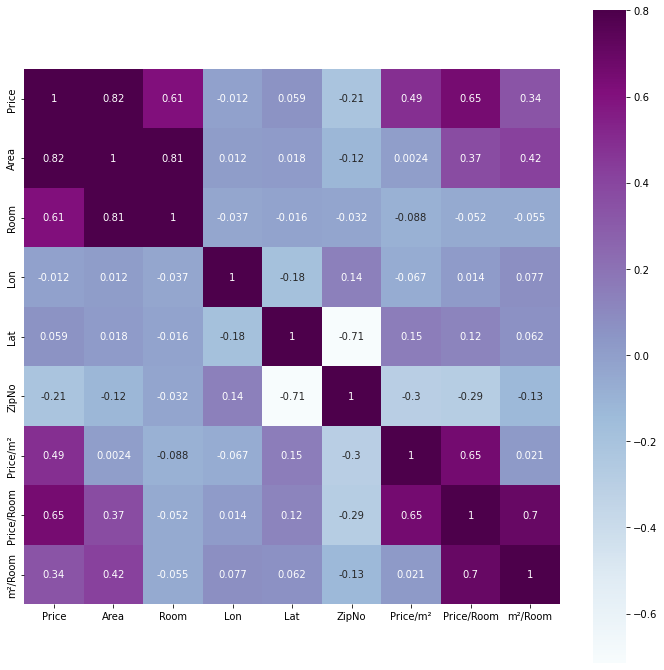

In [33]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot = True,vmax=.8,square=True,cmap="BuPu")